In [1]:
import json
from os import path, listdir, curdir
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import parser
import os
from tqdm import tqdm
from typing import Tuple

notebook_path = path.realpath(curdir)
data_path = path.join(path.dirname(notebook_path), "data")
audio_path = path.join(data_path, "Sample Audio")
movement_path = path.join(data_path, "Sample Motion")

In [2]:
with open(path.join(movement_path,'20181021_1600.json'),"r") as f:
    d_good = json.load(f)
with open(path.join(movement_path,'20181021_1900.json'),"r") as f:
    d_bad = json.load(f)

In [3]:
def process_json(json_data):
    data = json_data['data']
    m = np.zeros([len(data),3])
    variables = []
    times = []
    for i in tqdm(range(len(data))):
        m[i,:4] = data[i]['event']['content'][:3]
        variables.append(data[i]['event']['variable'])
        times.append(datetime.utcfromtimestamp(data[i]['timestamp']/1000))
        
    variables = np.array(variables)
#     mask = np.logical_or(variables=="NGIMU-PEPA.acceleration", variables=="NGIMU-SALT.acceleration")
#     mask = variables=="NGIMU-PEPA.acceleration"
    mask = variables=="NGIMU-SALT.acceleration"

    m = m[mask]
    times = np.array(times)[mask]
    return m, times

In [4]:
m_g, times_g = process_json(d_good)
m_b, times_b = process_json(d_bad)

100%|██████████| 725948/725948 [00:01<00:00, 412975.74it/s]


In [5]:
for i in range(0,2):
    print(times_g[i])

2018-10-21 16:00:00.012000
2018-10-21 16:00:00.032000


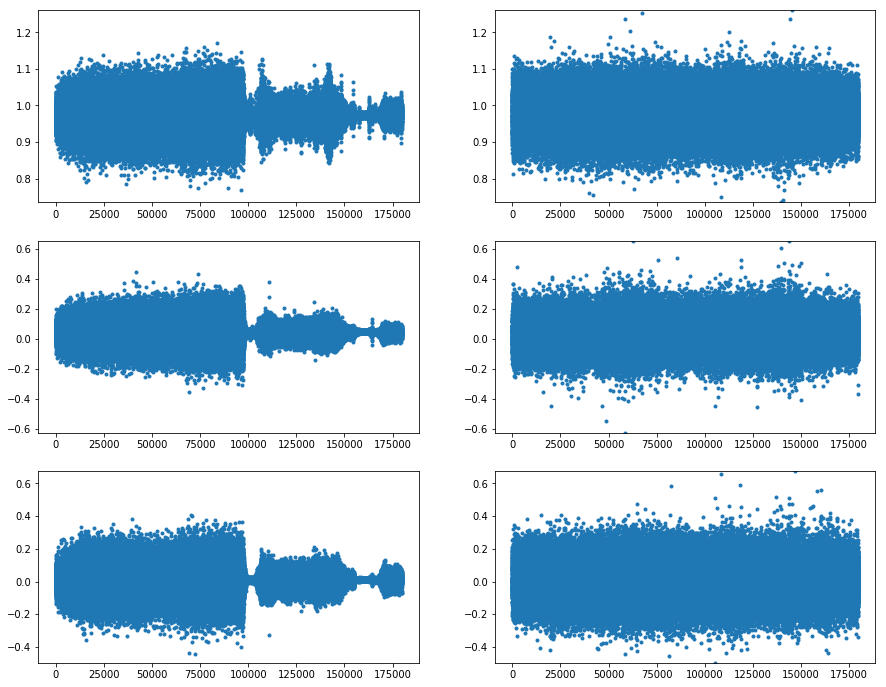

In [6]:
j = 1
fig = plt.figure(figsize=(15, 12))
for dim in range(3):
    both = np.concatenate([m_g[:,dim],m_b[:,dim]])
    ylim_min = np.min(both)
    ylim_max = np.max(both)
    
    plt.subplot(3, 2, j)
    plt.plot(m_g[:,dim], '.')
    plt.ylim([ylim_min, ylim_max])
    j += 1
    plt.subplot(3, 2, j)
    plt.plot(m_b[:,dim], '.')
    plt.ylim([ylim_min, ylim_max])
    j += 1
    
plt.show()
    

In [7]:
t_delta = times_g[1]-times_g[0]
period = t_delta.total_seconds()
period

0.02

In [8]:
start_min = 3
end_min = 3.3

range_min = int(start_min*60/period)
range_max = int(end_min*60/period)
print(range_min, range_max)

9000 9900


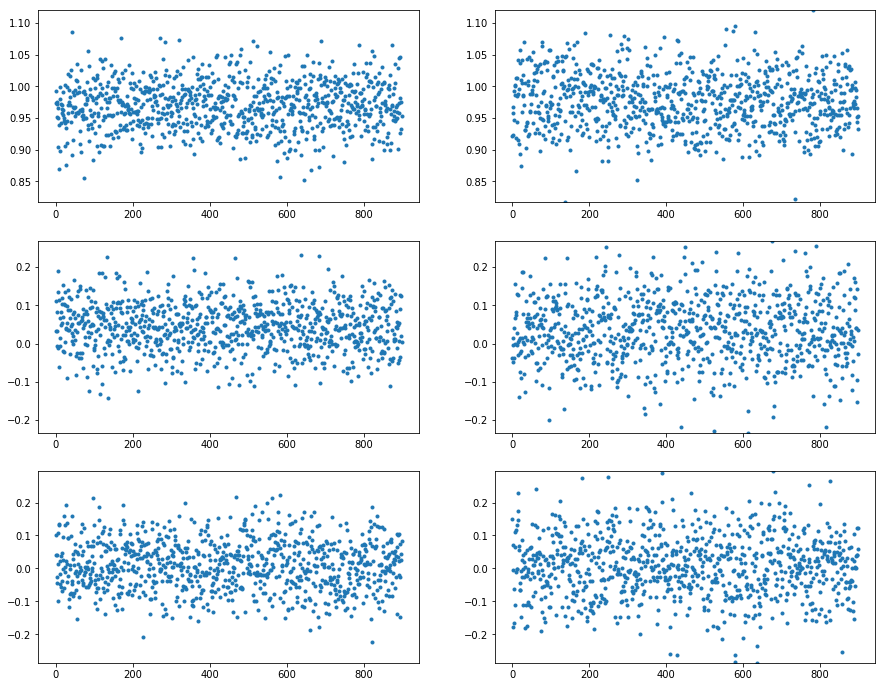

In [9]:
j = 1
fig = plt.figure(figsize=(15, 12))
for dim in range(3):
    both = np.concatenate([m_g[range_min:range_max,dim],m_b[range_min:range_max,dim]])
    ylim_min = np.min(both)
    ylim_max = np.max(both)
    
    plt.subplot(3, 2, j)
    plt.plot(m_g[range_min:range_max,dim], '.')
    plt.ylim([ylim_min, ylim_max])
    j += 1
    plt.subplot(3, 2, j)
    plt.plot(m_b[range_min:range_max,dim], '.')
    plt.ylim([ylim_min, ylim_max])
    j += 1
    
plt.show()

In [10]:
def filter_arr(vect: np.ndarray, keep_range: Tuple) -> np.ndarray:
    mask = np.logical_and(vect>keep_range[0], vect<keep_range[1])
    return vect[mask]

mg_fil = filter_arr(m_g[range_min:range_max,1], (-0.4, 0.4))
mb_fil = filter_arr(m_b[range_min:range_max,1], (-0.4, 0.4))

(-0.4, 0.4)

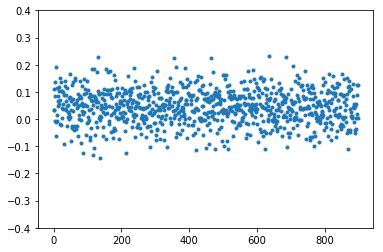

In [11]:
plt.plot(mg_fil, '.')
plt.ylim([-0.4, 0.4])

(-0.4, 0.4)

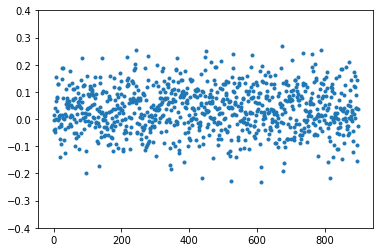

In [12]:
plt.plot(mb_fil, '.')
plt.ylim([-0.4, 0.4])

In [13]:
mg_fil = filter_arr(m_g[range_min:range_max,2], (-0.4, 0.4))
mb_fil = filter_arr(m_b[range_min:range_max,2], (-0.4, 0.4))

(-0.4, 0.4)

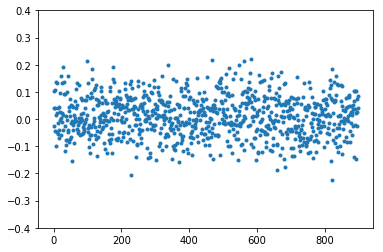

In [14]:
plt.plot(mg_fil, '.')
plt.ylim([-0.4, 0.4])

(-0.4, 0.4)

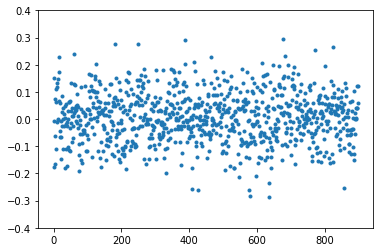

In [15]:
plt.plot(mb_fil, '.')
plt.ylim([-0.4, 0.4])